       Formatas  Įrašymo greitis (eil./s)  Skaitymo greitis (eil./s)  \
5       Feather                    500000                     700000   
1       Parquet                    200000                     250000   
4          HDF5                    300000                     500000   
0           CSV                    100000                     150000   
6           SQL                     50000                     100000   
3          JSON                     50000                      60000   
2  Excel (XLSX)                     10000                      15000   

   Failo dydis (MB)                                           Pastabos  \
5                25             Itin greitas, bet ne žmogui skaitomas.   
1                20  Labai geras suspaudimas, tinka dideliems rinki...   
4                50         Greitas, bet reikalauja specialių įrankių.   
0               100              Lengvai skaitomas, bet dideli failai.   
6                80             Leidžia papildomas už

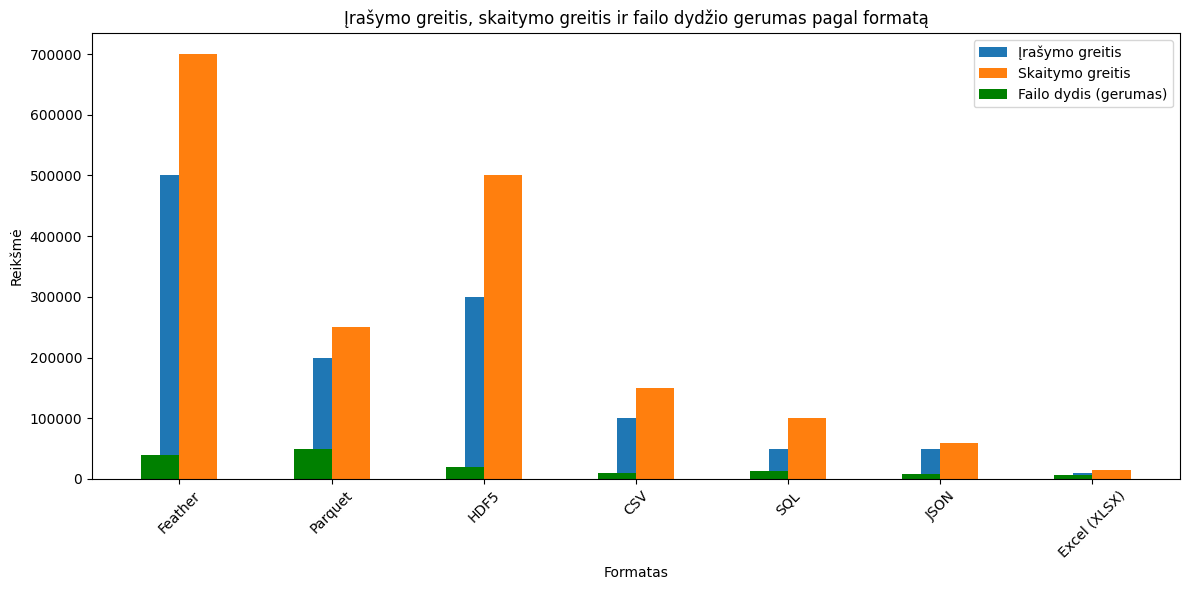

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sukuriame duomenų lentelę
data = {
    "Formatas": ["CSV", "Parquet", "Excel (XLSX)", "JSON", "HDF5", "Feather", "SQL"],
    "Įrašymo greitis (eil./s)": [100000, 200000, 10000, 50000, 300000, 500000, 50000],
    "Skaitymo greitis (eil./s)": [150000, 250000, 15000, 60000, 500000, 700000, 100000],
    "Failo dydis (MB)": [100, 20, 150, 120, 50, 25, 80],  # SQL dydis apskaičiuotas (~80 MB)
    "Pastabos": [
        "Lengvai skaitomas, bet dideli failai.",
        "Labai geras suspaudimas, tinka dideliems rinkiniams.",
        "Lėtas, bet naudingas vartotojams su Excel įrankiais.",
        "Didesnis failas dėl sudėtingos struktūros.",
        "Greitas, bet reikalauja specialių įrankių.",
        "Itin greitas, bet ne žmogui skaitomas.",
        "Leidžia papildomas užklausų galimybes.",
    ],
}

# Sukuriame Pandas DataFrame
df = pd.DataFrame(data)

# Konvertuojame failo dydį į atvirkštinį (gerumo skalė: didesnė reikšmė = geriau)
df["Failo dydis (gerumas)"] = 1 / df["Failo dydis (MB)"]

# Apskaičiuojame rangus
df["Įrašymo greitis (rangas)"] = df["Įrašymo greitis (eil./s)"].rank(ascending=False)
df["Skaitymo greitis (rangas)"] = df["Skaitymo greitis (eil./s)"].rank(ascending=False)
df["Failo dydis (rangas)"] = df["Failo dydis (gerumas)"].rank(ascending=False)

# Apskaičiuojame rangų sumą ir išrikiuojame eiles
df["Rangų suma"] = (
    df["Įrašymo greitis (rangas)"]
    + df["Skaitymo greitis (rangas)"]
    + df["Failo dydis (rangas)"]
)
df = df.sort_values("Rangų suma")

# Atspausdiname rezultatus
print(df)

# Diagramai paruošiame duomenis
x = df["Formatas"]
width = 0.25  # Stulpelio plotis

# Sukuriame stulpelinę diagramą
plt.figure(figsize=(12, 6))
plt.bar(
    x,
    df["Įrašymo greitis (eil./s)"],
    width=width,
    label="Įrašymo greitis",
    align="center",
)
plt.bar(
    x,
    df["Skaitymo greitis (eil./s)"],
    width=width,
    label="Skaitymo greitis",
    align="edge",
)
plt.bar(
    x,
    df["Failo dydis (gerumas)"] * 1e6,  # Padidiname reikšmes vizualumui
    width=-width,
    label="Failo dydis (gerumas)",
    align="edge",
    color="green",
)

plt.title("Įrašymo greitis, skaitymo greitis ir failo dydžio gerumas pagal formatą")
plt.xlabel("Formatas")
plt.ylabel("Reikšmė")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Išsaugome ir parodome diagramą
plt.savefig("formatai_diagrama.png")
plt.show()
